In [1]:
import os

from binance.client import Client

In [2]:
# init
api_key = os.environ.get('binance_api')
api_secret = os.environ.get('binance_secret')

In [3]:
client = Client('id #','id token')

In [4]:
# get latest price from Binance API
btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
# print full output (dictionary)
print(btc_price)

{'symbol': 'BTCUSDT', 'price': '38380.38000000'}


In [5]:
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
print(timestamp)

1502928000000


In [6]:
bars = client.get_historical_klines('BTCUSDT', '1d', timestamp, limit=100)

In [7]:
for line in bars:
    del line[6:]

In [8]:
import pandas as pd
btc_df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'Close','Volume'])
btc_df.set_index('date', inplace=True)
print(btc_df.tail())

                         open            high             low           Close  \
date                                                                            
1643328000000  37160.11000000  38000.00000000  36155.01000000  37716.56000000   
1643414400000  37716.57000000  38720.74000000  37268.44000000  38166.84000000   
1643500800000  38166.83000000  38359.26000000  37351.63000000  37881.76000000   
1643587200000  37881.75000000  38744.00000000  36632.61000000  38466.90000000   
1643673600000  38466.90000000  39100.00000000  38000.00000000  38375.44000000   

                       Volume  
date                           
1643328000000  42154.26956000  
1643414400000  26129.49682000  
1643500800000  21430.66527000  
1643587200000  36855.24580000  
1643673600000  15062.37906000  


In [9]:
btc_df.index = pd.to_datetime(btc_df.index, unit='ms')

In [10]:
import os

os.chdir("/Users/apple/Desktop/Trading")


In [11]:
btc_df = btc_df.astype(float, errors = 'raise')
btc_df.shape

(1630, 5)

In [14]:
btc_df.tail(10)

,open,high,low,Close,Volume
date,,,,,
2022-01-23,35071.42,36499.00,34601.01,36244.55,44279.523540
2022-01-24,36244.55,37550.00,32917.17,36660.35,91904.753211
2022-01-25,36660.35,37545.14,35701.00,36958.32,49232.401830
2022-01-26,36958.32,38919.98,36234.63,36809.34,69830.160360
2022-01-27,36807.24,37234.47,35507.01,37160.10,53020.879340
2022-01-28,37160.11,38000.00,36155.01,37716.56,42154.269560
2022-01-29,37716.57,38720.74,37268.44,38166.84,26129.496820
2022-01-30,38166.83,38359.26,37351.63,37881.76,21430.665270
2022-01-31,37881.75,38744.00,36632.61,38466.90,36855.245800


In [15]:
import numpy as np

from datetime import datetime 
import yfinance as yf
#import mplfinance as mpf
#start_date = datetime (2015, 6, 1)
#end_date = datetime(2021, 7, 8)
#data = yf.download('BTC-USD', start=start_date, end=end_date)
#data = yf.download('MSFT', start=start_date, end=end_date)
df = btc_df
df['dv'] = df['Close']*df['Volume']
#print(btc)
#mpf.plot(btc, type='candle',mav=(10,20,50),volume=True, show_nontrading=True)
#close = data["Close"]
#close = pd.DataFrame(data= close)

In [16]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df['dv']
    ts = 0
    idx = []
    for i, x in enumerate(t):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

dollar_M = df['dv'].mean()
dollar_M
dv_column = df['dv']
#dollar_M = 90_000_000_000 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, df['dv'], dollar_M)
dv_bar_df.describe()

close = dv_bar_df['Close']


dollar threshold: 1,055,690,211.6761099


In [17]:
close = pd.DataFrame(data= dv_bar_df['Close'])
close

,Close
date,
2017-11-29,9687.88
2017-12-09,14656.07
2017-12-15,17539.83
2017-12-21,15492.64
2017-12-25,13699.34
...,...
2022-01-26,36809.34
2022-01-27,37160.10
2022-01-28,37716.56


In [18]:
#import numpy as np
#import pandas as pd
#from datetime import datetime 
#import yfinance as yf
#import mplfinance as mpf
#start_date = datetime (2020, 1, 1)
#end_date = datetime(2021, 7, 8)
#btc = yf.download('BTC-USD', start=start_date, end=end_date)
#data = yf.download('PEP', start=start_date, end=end_date)
#df = pd.DataFrame(data= data)
#df['dv'] = df['Adj Close']*df['Volume']
#print(btc)
#mpf.plot(btc, type='candle',mav=(10,20,50),volume=True, show_nontrading=True)
#close = data["Close"]
#close = pd.DataFrame(data= close)
def getDailyVol(close,span0=100):
     
    df0=close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0=df0[df0>0]
    df0=pd.Series(close.index[df0-1],index=close.index[close.shape[0]-df0.shape[0]:])
    df0=close.loc[df0.index]/close.loc[df0.values].values-1#daily returns
    df0=df0.ewm(span=span0).std()
    #df0=df0.rename(columns={'Close':'volatilities'})
    return df0

def getTEvents1(gRaw,h):
    tEvents=[]
    for i in gRaw.index[1:]:
        tEvents.append(i)
    return pd.DatetimeIndex(data=tEvents[1:len(tEvents)-1])

def getTEvents(gRaw,h):
    tEvents,sPos,sNeg=[],0,0
    #diff = gRaw.diff()
    diff = np.log(gRaw).diff().dropna()
    #print(diff)
    for i in diff.index[1:]:
        sPos,sNeg=max(0,sPos+diff.loc[i].item),min(0,sNeg+diff.loc[i].item)
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
    return pd.DatetimeIndex(tEvents)   

def getVerticalBarriers(close, tEvents, numDays):
    t1 = close.index.searchsorted(tEvents+pd.Timedelta(days=numDays))
    t1 = t1[t1 < close.shape[0]]
    t1 = pd.Series(close.index[t1], index=tEvents[:t1.shape[0]]) # NaNs at the end
    return t1

def applyPtSlOnT1(close,events,ptSl,molecule,t11):
    events_=events.loc[molecule]
    if ptSl[0]>0: pt=ptSl[0]*events_['trgt']
    else: pt=pd.Series(index=events.index) # NaNs
    if ptSl[1]>0: sl=-ptSl[1]*events_['trgt']
    else: sl=pd.Series(index=events.index) # NaNs
    sl=sl.loc[molecule]
    
    sl1=pd.DataFrame(sl.values,index=sl.index.date,columns=['sl'])
    pt=pt.loc[molecule]
    
    pt1=pd.DataFrame(pt.values,index=pt.index.date,columns=['pt'])
    df0=close.loc[molecule] # path prices
    df1=close.loc[t11]
    
    df2=pd.DataFrame(df1.values/df0.values-1,index=df1.index,columns=['returns']) # path returns
    
    bin=pd.DataFrame(np.sign(df2.values),index=df1.index,columns=['bin'])
    cc=df2[(df2.values>=sl1.values)&(df2.values<=pt1.values)]
    trgtc=trgt.loc[cc.index]
    binc=pd.DataFrame(0,index=cc.index,columns=['bin'])
    cc1=pd.concat([cc,trgtc,binc],axis=1)
    aa=df2[df2.values<sl1.values] # .index.min() earliest stop loss
    trgta=trgt.loc[aa.index]
    bina=bin.loc[aa.index]
    aa1=pd.concat([aa,trgta,bina],axis=1)
    bb=df2[df2.values>pt1.values] # earliest profit taking
    trgtb=trgt.loc[bb.index]
    binb=bin.loc[bb.index]
    bb1=pd.concat([bb,trgtb,binb],axis=1)
    return[aa1,bb1,cc1]

def getEvents(close, tEvents, ptSl, trgt, minRet, numThreads, d1=False, side=None):
    #1) get target
    trgt=trgt.loc[tEvents]
    trgt=trgt[trgt>minRet] # minRet
    #2) get t1 (max holding period)
    if d1 is False:d1=pd.Series(pd.NaT, index=tEvents)
    #3) form events object, apply stop loss on t1
    if side is None:side_,ptSl_=pd.Series(1.,index=trgt.index), [ptSl[0],ptSl[1]]
    else: side_,ptSl_=side.loc[trgt.index],ptSl[:2]
    
    SS=pd.concat({'t1':t1,'trgt':trgt,'side':side_}, axis=1).dropna()
    #print(SS)
    t11=t1.loc[SS.index]
    events=applyPtSlOnT1(close,events=SS,ptSl=ptSl_,molecule=SS.index,t11=t11)
    
    return events
 
dailyVol = getDailyVol(close)
#print(dailyVol)

h1=dailyVol.mean().item()

#tevents=getTEvents(close, h = h1)
tevents=getTEvents1(close, h =h1)
tEvents=tevents
numDays = 1

t1 = getVerticalBarriers(close, tEvents, numDays)

trgt=pd.DataFrame(data=dailyVol)
events = getEvents(close, tEvents=tEvents, ptSl=[1,1], trgt=trgt, minRet=0.01,numThreads=1)

#print(events[0])

out1=pd.concat([events[0],events[1],events[2]],axis=0).sort_index()
out=pd.concat([events[0],events[1]],axis=0).sort_index()

print(out)

Даты пересечения порогов
             returns     Close  bin
date                               
2018-02-02 -0.211356  0.184971 -1.0
2018-03-30 -0.159081  0.135270 -1.0
2018-05-11 -0.130346  0.119601 -1.0
2018-05-26 -0.124955  0.115752 -1.0
2018-06-10 -0.112788  0.111939 -1.0
...              ...       ...  ...
2021-12-09 -0.057966  0.051661 -1.0
2021-12-13 -0.066951  0.052032 -1.0
2021-12-28 -0.062280  0.048748 -1.0
2022-01-05 -0.051948  0.047834 -1.0
2022-01-21 -0.104118  0.046811 -1.0

[115 rows x 3 columns]


In [19]:
df['pct_change'] = df.Close.pct_change()
df['log_ret'] = np.log(df.Close) - np.log(df.Close.shift(1))
df['acf_logr'] = df.log_ret.rolling(10).apply(lambda x: x.autocorr(), raw=False)
df['acf_close'] = df.Close.rolling(10).apply(lambda x: x.autocorr(), raw=False)
df['sigma'] = dailyVol
df['Date'] = df.index
df

,open,high,low,Close,Volume,dv,pct_change,log_ret,acf_logr,acf_close,sigma,Date
date,,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.407283e+06,NaN,NaN,NaN,NaN,NaN,2017-08-17
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,4.929585e+06,-0.041238,-0.042113,NaN,NaN,NaN,2017-08-18
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.578615e+06,0.007694,0.007665,NaN,NaN,NaN,2017-08-19
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.908637e+06,-0.012969,-0.013053,NaN,NaN,NaN,2017-08-20
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.778040e+06,-0.017201,-0.017351,NaN,NaN,NaN,2017-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,37160.11,38000.00,36155.01,37716.56,42154.269560,1.589914e+09,0.014975,0.014864,0.354909,0.662833,0.047950,2022-01-28
2022-01-29,37716.57,38720.74,37268.44,38166.84,26129.496820,9.972803e+08,0.011939,0.011868,0.378673,0.168243,NaN,2022-01-29
2022-01-30,38166.83,38359.26,37351.63,37881.76,21430.665270,8.118313e+08,-0.007469,-0.007497,0.567483,0.700456,0.047504,2022-01-30


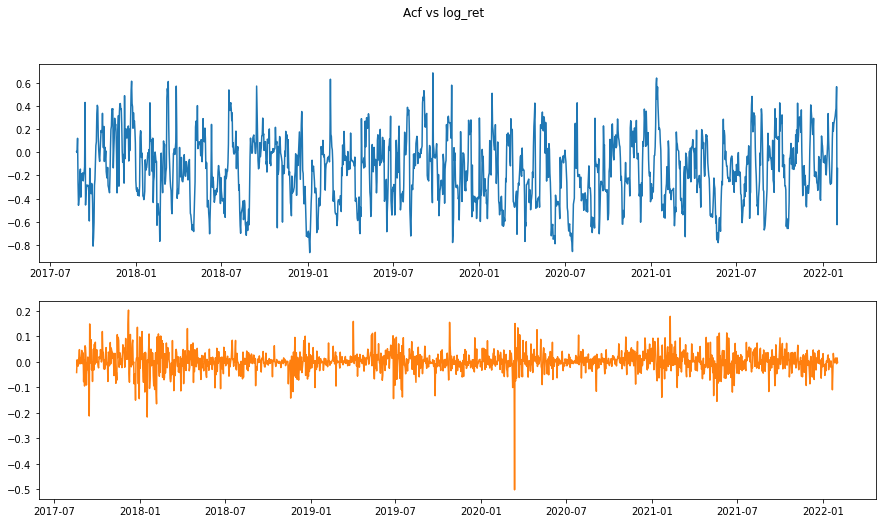

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
fig, axs = plt.subplots(2)
#plt.axvline(x=price,color='g')
fig.suptitle('Acf vs log_ret')
axs[0].plot(df.Date, df.acf_logr)
axs[1].plot(df.Date, df.log_ret,'tab:orange')
plt.show()

In [21]:
df1 = pd.DataFrame(data=out)
df1['Date'] = df1.index
df2=pd.merge(df,df1,on='Date')
df2





,open,high,low,Close_x,Volume,dv,pct_change,log_ret,acf_logr,acf_close,sigma,Date,returns,Close_y,bin
0,9224.52,9250.00,8010.02,8873.03,49971.626975,4.433997e+08,-0.038104,-0.038849,0.108640,0.853825,0.184971,2018-02-02,-0.211356,0.184971,-1.0
1,7090.16,7292.43,6600.10,6840.23,65306.031976,4.467083e+08,-0.035248,-0.035884,-0.320933,0.902291,0.135270,2018-03-30,-0.159081,0.135270,-1.0
2,9002.21,9016.80,8341.00,8400.00,48227.048061,4.051072e+08,-0.066895,-0.069237,0.404042,0.720366,0.119601,2018-05-11,-0.130346,0.119601,-1.0
3,7456.99,7620.00,7300.00,7333.96,19464.086071,1.427488e+08,-0.016500,-0.016638,0.091786,0.829343,0.115752,2018-05-26,-0.124955,0.115752,-1.0
4,7491.73,7491.73,6622.81,6764.99,52342.020032,3.540932e+08,-0.097006,-0.102039,0.241704,0.428226,0.111939,2018-06-10,-0.112788,0.111939,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,50471.19,50797.76,47320.00,47545.59,37692.686650,1.792121e+09,-0.057966,-0.059714,0.224844,0.842471,0.051661,2021-12-09,-0.057966,0.051661,-1.0
111,50053.90,50189.97,45672.75,46702.75,50869.520930,2.375747e+09,-0.066951,-0.069297,-0.058545,0.182683,0.052032,2021-12-13,-0.066951,0.052032,-1.0
112,50701.44,50704.05,47313.01,47543.74,45853.339240,2.180039e+09,-0.062280,-0.064304,-0.097859,0.545526,0.048748,2021-12-28,-0.062280,0.048748,-1.0
113,45832.01,47070.00,42500.00,43451.13,51784.118570,2.250078e+09,-0.051948,-0.053346,-0.092005,0.477212,0.047834,2022-01-05,-0.051948,0.047834,-1.0


In [22]:
cols = [0,1,2,3,4,5,6,7,11,12,13,14]
df2.drop(df2.columns[cols],axis=1,inplace=True)


In [23]:
df2

,acf_logr,acf_close,sigma
0,0.108640,0.853825,0.184971
1,-0.320933,0.902291,0.135270
2,0.404042,0.720366,0.119601
3,0.091786,0.829343,0.115752
4,0.241704,0.428226,0.111939
...,...,...,...
110,0.224844,0.842471,0.051661
111,-0.058545,0.182683,0.052032
112,-0.097859,0.545526,0.048748
113,-0.092005,0.477212,0.047834


In [24]:

#cols = [5]
#df2.drop(df2.columns[cols],axis=1,inplace=True)



In [25]:
df2 = df2.iloc[4: , :]
df2.count()

acf_logr     111
acf_close    111
sigma        111
dtype: int64

In [26]:
labels=pd.DataFrame(data= df1.bin)
labels=labels.iloc[4: , :]
labels.count()

bin    111
dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#from sklearn.datasets import make_classification # create dataset
from sklearn.model_selection import train_test_split

In [28]:
X = df2
y = labels
from sklearn.preprocessing import StandardScaler



In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, shuffle=True, stratify=None)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
# Benchmarks
rf_clf0 = RandomForestClassifier(n_estimators = 1000, 
                                bootstrap=True, 
                                n_jobs=1,
                                random_state=42,
                                oob_score=True)

base_estimate0 = DecisionTreeClassifier()


bag_clf0 = BaggingClassifier(base_estimator = base_estimate0,
                                n_estimators = 1000,
                                bootstrap=True, 
                                n_jobs=1, 
                                random_state=42,
                                oob_score=True)


rf_clf0.fit(X_train, y_train)
bag_clf0.fit(X_train, y_train)

print('Default rf Out-of-bag score: {}\n'.format(rf_clf0.oob_score_))
print('Default dt Out-of-bag score: {}\n'.format(bag_clf0.oob_score_))

<ipython-input-29-d32387bafee1>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf0.fit(X_train, y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Default rf Out-of-bag score: 0.696969696969697

Default dt Out-of-bag score: 0.5757575757575758



In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

accuracy_array = np.zeros(5)

skf = StratifiedKFold(n_splits=5, 
                      shuffle=True, #shuffle = True
                      random_state = 42)

i = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_clf0.fit(X_train, y_train.values.ravel()) #use the original rf cls
    y_pred_rf = rf_clf0.predict_proba(X_test)[:, 1] #True positive only
    y_pred = rf_clf0.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)
    i += 1

print("Mean Strat KFold accuracy with shuffle: {:.8f}".format(np.mean(accuracy_array)))

Mean Strat KFold accuracy with shuffle: 0.71185771


In [31]:
avgU = 0.5

rf_clf = RandomForestClassifier(n_estimators = 1000,
                                criterion = "entropy",
                                max_samples=avgU, #note averge unique used
                                bootstrap=True, 
                                n_jobs=1,
                                random_state=42,
                                class_weight="balanced_subsample",
                                oob_score=True)

clf = DecisionTreeClassifier(criterion = "entropy", 
                             max_features="auto", 
                             class_weight="balanced")

bag_clf = BaggingClassifier(base_estimator = clf,
                            n_estimators = 1000, 
                            max_samples=avgU, #note averge unique used
                            bootstrap=True, 
                            n_jobs=1,
                            random_state=42,
                            oob_score=True)

rf_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

print('rf_clf rf Out-of-bag score: {}\n'.format(rf_clf.oob_score_))
print('bag_clf Out-of-bag score: {}\n'.format(bag_clf.oob_score_))

<ipython-input-31-f706e0c4a21a>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


rf_clf rf Out-of-bag score: 0.651685393258427

bag_clf Out-of-bag score: 0.651685393258427



In [32]:
#based on book recommendation
rf_clf1 = RandomForestClassifier(n_estimators = 1000,
                                criterion = "entropy",
                                bootstrap=True, 
                                n_jobs=1,
                                random_state=42,
                                class_weight="balanced_subsample",
                                oob_score=True)

clf1 = DecisionTreeClassifier(criterion = "entropy",
                             splitter="random", #added random as splitter, which was in rf but not in dt
                             max_features=None, 
                             class_weight="balanced")

bag_clf1 = BaggingClassifier(base_estimator = clf1,
                            n_estimators = 850, 
                            max_samples=avgU, #note averge unique used
                            bootstrap=True, 
                            n_jobs=1,
                            random_state=42,
                            oob_score=True)

rf_clf1.fit(X_train, y_train)
bag_clf1.fit(X_train, y_train)



print('rf_clf rf Out-of-bag score: {}\n'.format(rf_clf1.oob_score_))
print('bag_clf Out-of-bag score: {}\n'.format(bag_clf1.oob_score_))

<ipython-input-32-64d3c1cab54a>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf1.fit(X_train, y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


rf_clf rf Out-of-bag score: 0.6629213483146067

bag_clf Out-of-bag score: 0.651685393258427



In [33]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

fn=X
cn=y

len(rf_clf1.estimators_)



1000

In [34]:
y_pred = rf_clf1.predict(X_test)
y_pred[:5]


array([-1.,  1., -1.,  1., -1.])

In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.36363636363636365
Mean Squared Error: 0.7272727272727273
Root Mean Squared Error: 0.8528028654224418


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6  3]
 [ 1 12]]
              precision    recall  f1-score   support

        -1.0       0.86      0.67      0.75         9
         1.0       0.80      0.92      0.86        13

    accuracy                           0.82        22
   macro avg       0.83      0.79      0.80        22
weighted avg       0.82      0.82      0.81        22

0.8181818181818182


In [37]:
X_test.head()

,acf_logr,acf_close,sigma
4,0.241704,0.428226,0.111939
8,0.150654,0.889595,0.089354
10,-0.467084,0.866664,0.094584
30,0.162916,0.946277,0.089570
33,0.300161,0.447460,0.086736


In [38]:
y_pred

array([-1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.])

In [39]:
y_train

,bin
date,
2018-07-18,1.0
2018-08-07,-1.0
2018-09-06,-1.0
2018-11-21,-1.0
2018-12-06,-1.0
...,...
2021-11-26,-1.0
2021-12-04,-1.0
2021-12-09,-1.0


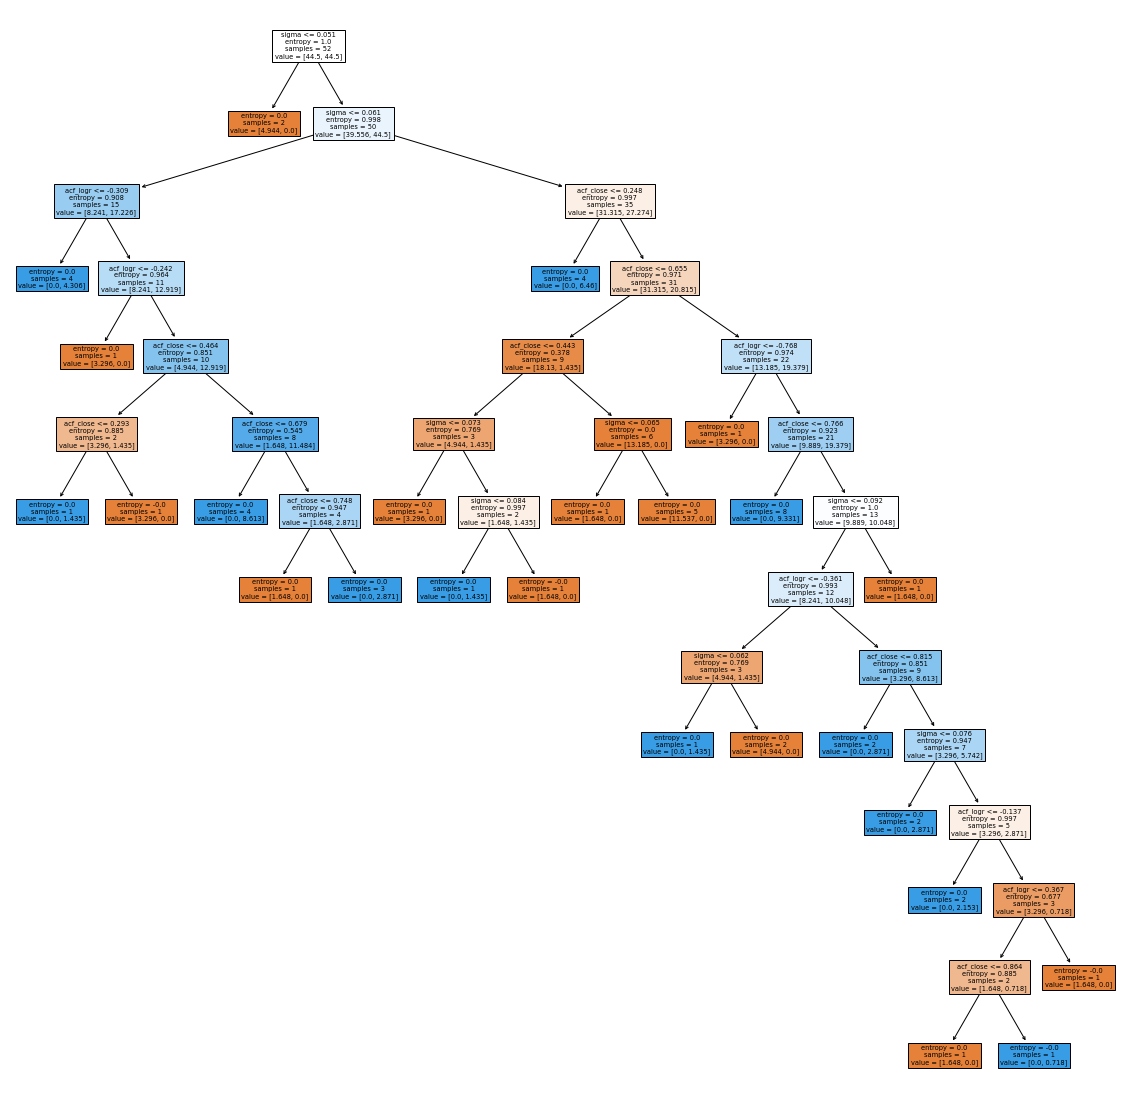

In [40]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_clf1.estimators_[997], feature_names=X.columns, filled=True)

In [41]:
imp = rf_clf1.feature_importances_

In [42]:
col = X_train.columns

In [43]:
rfc_cofs = pd.Series(imp,col)
rfc_cofs

acf_logr     0.309387
acf_close    0.341127
sigma        0.349486
dtype: float64

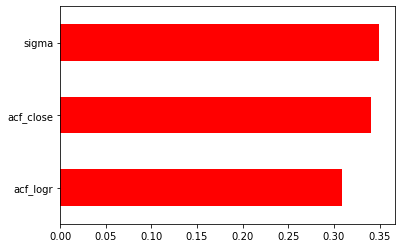

In [44]:
%matplotlib inline
rfc_cofs.sort_values().plot.barh(color='red');